Reference site
- https://analytics-note.xyz/statistics/log-normal-distribution/
- https://analytics-note.xyz/statistics/scipy-lognorm/

## 対数正規分布とは
- 対数正規分布は、連続確率分布の一種であり、対数が正規分布に従う確率変数を定義します。
  - 確率変数 $X$ が正規分布に従うとき、指数関数 $e^X$ は対数正規分布に従う
- 対数正規分布に従う確率変数 $X$ はモーメント母関数は存在しない
- 注意点として、確率密度関数中の $\mu$ と $\sigma$ は正規分布と異なり、それぞれの平均、分散には対応しない

## 確率変数 $X$ の平均と分散

$$ 平均 = \mu, \quad 分散 = \sigma^2 $$

## 対数正規分布の確率密度関数
$$ f(x) = \frac{1}{\sqrt{2\pi}\sigma x} \exp\Big(-\frac{(\log x - \mu)^2}{2\sigma^2}\Big) $$

## 対数正規分布の平均と分散
$$
E[X] = \exp \Big(\mu + \frac{\sigma^2}{2}\Big)
$$
$$
V[X] = \exp (2\mu+\sigma^2) (\exp(\sigma^2)-1)
$$

## 期待値と分散から対数正規分布のパラメータを求める
$$
\sigma_Y = \sqrt{\ln\Big(\frac{\sigma}{\mu}^2\Big) +1}
$$
$$
\mu_Y = ln(\mu) - \frac{\sigma^2}{2} $$
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
import japanize_matplotlib

Xは期待値は4.8、標準偏差は0.1の対数正規分布に従う
5を超える確率を求めたい

- 期待値と分散
$$ \mu = 4.8, \quad \sigma = 0.1 $$
- 対数正規分布のパラメータに変換
$$ \sigma_Y = \sqrt{\ln\Big(\frac{\sigma}{\mu}^2\Big) +1} $$
$$ \mu_Y = ln(\mu) - \frac{\sigma^2}{2} $$

指数と対数
$$ y = e^x \rightarrow ln(y) = x $$
対数正規分布
$$ X \sim N(\mu, \sigma) の時 Y=e^x は対数正規分布に従う $$

対数正規分布の確率密度関数
$$
f(x) = \frac{1}{\sqrt{2\pi}\sigma x} \exp(-\frac{(\log x - \mu)^2}{2\sigma^2})
$$
Scipyの対数正規分布の確率密度関数
$$
f(x, s) = \frac{1}{sx\sqrt{2\pi}} \exp(-\frac{\log^2 x}{2 s^2})
$$

- 対数正規分布とは
  - 確率変数 $X$ が正規分布に従うとき，$\exp(X)$ が従う分布を対数正規分布と言う
- Xの計測結果は$\mu=172.6$, 標準偏差$\sigma=0.15$
- Xは対数正規分布に従う

$$
X \sim N(\mu, \sigma^2)
$$
$$
ln(X) \sim LogNorm(exp \Big(\mu+\frac{\sigma^2}{2}\Big), (\exp \sigma^2 -1) \exp(2\mu+\sigma^2))
$$

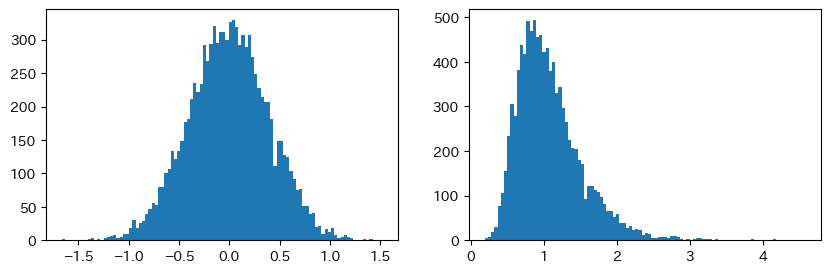

In [2]:
# 正規分布から対数正規分布を作成
norm_data = norm(loc=0, scale=0.4).rvs(size=10000)
log_data = np.exp(norm_data)
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].hist(norm_data, bins=100)
axs[1].hist(log_data, bins=100)
plt.show()

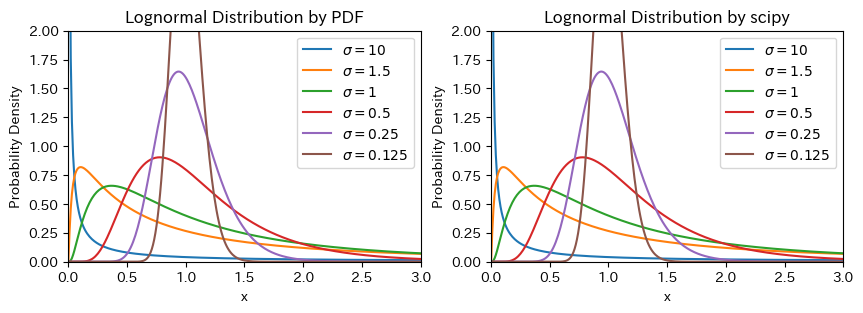

In [13]:
# グラフセッティング
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].set_xlim(0, 3)
axs[0].set_ylim(0, 2)
axs[0].set_xlabel('x')
axs[0].set_ylabel('Probability Density')
axs[0].set_title('Lognormal Distribution by PDF')

axs[1].set_xlim(0, 3)
axs[1].set_ylim(0, 2)
axs[1].set_xlabel('x')
axs[1].set_ylabel('Probability Density')
axs[1].set_title('Lognormal Distribution by scipy')

def lognorm_pdf(x):
    '''対数正規分布の確率密度関数を定義'''
    return 1 / (x * sigma * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))

# グラフの作成
mu = 0
x = np.linspace(0.001, 10, 1000)
    # 確率密度関数により作成
for sigma in [10, 1.5, 1, 1/2, 1/4, 1/8]:
    pdf_values = lognorm_pdf(x)
    axs[0].plot(x, pdf_values, label=f'$\sigma={sigma}$')

    # scipy により作成
    # 対数正規分布のパラメータを計算
    s = sigma
    scale = np.exp(mu)
    # 対数正規分布を生成
    lognorm_dist = lognorm(s=s, loc=0, scale=scale)
    # 確率密度関数を描画
    pdf_values = lognorm_dist.pdf(x)
    axs[1].plot(x, pdf_values, label=f'$\sigma={sigma}$')

axs[0].legend()
axs[1].legend()
plt.show()


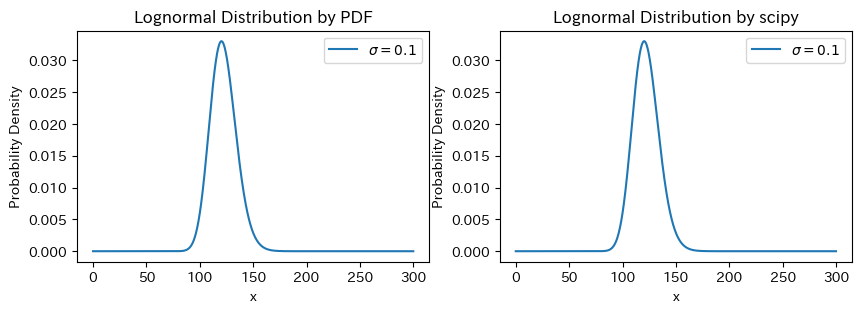

In [20]:
# グラフセッティング
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
# axs[0].set_xlim(0, 3)
# axs[0].set_ylim(0, 2)
axs[0].set_xlabel('x')
axs[0].set_ylabel('Probability Density')
axs[0].set_title('Lognormal Distribution by PDF')

# axs[1].set_xlim(0, 3)
# axs[1].set_ylim(0, 2)
axs[1].set_xlabel('x')
axs[1].set_ylabel('Probability Density')
axs[1].set_title('Lognormal Distribution by scipy')

def lognorm_pdf(x):
    '''対数正規分布の確率密度関数を定義'''
    return 1 / (x * sigma * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))

# グラフの作成
mu = 4.8
x = np.linspace(0.001, 300, 1000)
    # 確率密度関数により作成
for sigma in [0.1]:
    pdf_values = lognorm_pdf(x)
    axs[0].plot(x, pdf_values, label=f'$\sigma={sigma}$')

    # scipy により作成
    # 対数正規分布のパラメータを計算
    s = sigma
    scale = np.exp(mu)
    # 対数正規分布を生成
    lognorm_dist = lognorm(s=s, loc=0, scale=scale)
    # 確率密度関数を描画
    pdf_values = lognorm_dist.pdf(x)
    axs[1].plot(x, pdf_values, label=f'$\sigma={sigma}$')

axs[0].legend()
axs[1].legend()
plt.show()


対数の平均: -6.8938261691561715
対数の標準偏差: 1.0119267957447793


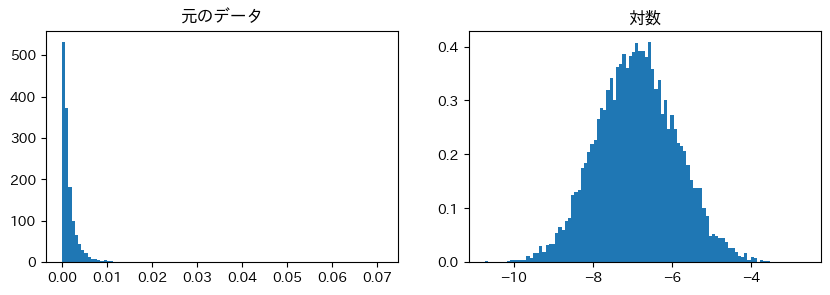

In [41]:
s, scale = 1, 0.001
data = lognorm(s=s, scale=scale).rvs(size=10000)
log_data = np.log(data)
print("対数の平均:", log_data.mean())
# 対数の平均: 4.607122120944554
print("対数の標準偏差:", log_data.std())
# 対数の標準偏差: 0.49570170767616645

fig = plt.figure(figsize=(10, 3), facecolor="w")
ax = fig.add_subplot(1, 2, 1, title="元のデータ")
ax.hist(data, bins=100, density=True)
ax = fig.add_subplot(1, 2, 2, title="対数")
ax.hist(log_data, bins=100, density=True)
# 期待値のところに縦線引く
# ax.vlines(np.log(100), 0, 0.8)

plt.show()

In [43]:
x = np.linspace(0.01, 20, 1000)
mu = 4.8
sigma = 0.1
pdf = (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x) - mu) ** 2) / (2 * sigma ** 2))
pdf

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0